# Bayes Theorem and Naive Bayes

## Preliminaries

### Conditional Probability
$$P(A|B) = \frac{P(A,B)}{P(B)}$$

### Chain Rule
$$P(A,B) = P(A|B)P(B)$$

### Independence
$$P(A,B) = P(A)P(B)$$

### Conditional Independence
$$P(A,B|C) = P(A|C)P(B|C)$$

### Marginal Probability
$$P(A) = \sum_{B}P(A,B)$$

## Bayes Theorem
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
$P(A)$ is called the **prior**, $P(B|A)$ is called the **likelihood**, and $P(A|B)$ is called the **posterior**.

### Question 1
A mammogram accurately classifies about 80% of cancerous tumors and 90% of benign tumors. If a woman is thought to have a 1% risk of breast cancer, what is the probability that she will have a positive mammogram result?

Prior: P(Malignant) = 0.01, P(Benign) = 0.99

Likelihood: P(Positive|Malignant) = 0.8, P(Positive|Benign) = 0.9

Posterior: P(Positive) = P(Positive|Malignant)P(Malignant) + P(Positive|Benign)P(Benign)

In [ ]:
0.8 * 0.01 + 0.1 * 0.99

0.10700000000000001

### Question 2
Consider a test to detect a disease that 0.1 % of the population have. The test is 99 % effective in detecting an infected person. However, the test gives a false positive result in 0.5 % of cases. If a person tests positive for the disease what is the probability that they actually have it? 

## Maximum Likelihood Estimation

Suppose a dataset $D = \{x_1, x_2, \ldots, x_N\}$ is sampled from a distribution $P(x|\theta)$, where $\theta$ is a parameter of the distribution. The likelihood probability is $$P(D|\theta) = \prod_{i=1}^N P(x_i|\theta).$$ The maximum likelihood estimate (MLE) of $\theta$ is $$\hat{\theta} = \arg\max_\theta P(D|\theta).$$

### Example
For a linear regression model, the dataset $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)\}$ is sampled from a distribution $P(x, y|\theta) = P(y|x, \theta)P(x)$, where $P(y|x, \theta) = \mathcal{N}(y; \theta_0 + \theta_1x, \sigma^2)$ and $P(x) = C$ (uniform distribution). The likelihood probability is $$P(D|\theta) = \prod_{i=1}^N P(y_i|x_i, \theta)P(x_i) = \prod_{i=1}^N \frac{C}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2}\right).$$ The MLE of $\theta$ is $$\begin{align*} \hat{\theta} &= \arg\max_\theta P(D|\theta) \\ &= \arg\max_\theta \prod_{i=1}^N \frac{C}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2}\right) \\ &= \arg\max_\theta \sum_{i=1}^N \log\left(\frac{C}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2}\right)\right) \\ &= \arg\max_\theta \sum_{i=1}^N \left(\log\frac{C}{\sqrt{2\pi\sigma^2}} - \frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2}\right) \\ &= \arg\min_\theta \sum_{i=1}^N (y_i - \theta_0 - \theta_1x_i)^2. \end{align*}$$

Therefore, the MLE of $\theta$ is the same as the least squares solution of the linear regression model.

## Maximum A Posteriori Estimation
Instead of maximizing the likelihood, we can maximize the posterior probability of the parameters given the data. The posterior probability is $$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}.$$
This is called maximum a posteriori (MAP) estimation. The MAP estimate of $\theta$ is $$\hat{\theta} = \arg\max_\theta P(\theta|D) = \arg\max_\theta P(D|\theta)P(\theta).$$

### Example

Following the example of linear regression, we assume that the parameters $\theta$ follows a Gaussian distribution with mean $0$ and variance $\sigma^2$. Then the MAP estimate of $\theta$ is $$\begin{align*} \hat{\theta} &= \arg\max_\theta P(D|\theta)P(\theta) \\ &= \arg\max_\theta \prod_{i=1}^N \exp\left(-\frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2}\right)\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\|\theta\|^2}{2\sigma^2}\right).\\&= \arg\max_\theta \sum_{i=1}^N \left(-\frac{(y_i - \theta_0 - \theta_1x_i)^2}{2\sigma^2} - \frac{\|\theta\|^2}{2\sigma^2}\right) \\ &= \arg\min_\theta \sum_{i=1}^N (y_i - \theta_0 - \theta_1x_i)^2 + \frac{\|\theta\|^2}{\sigma^2}. \end{align*}$$

Therefore, the MAP estimate of $\theta$ is the same as adding a L2 regularization to the least squares solution of the linear regression model.

If we use a Laplace distribution instead of a Gaussian distribution, the MAP estimate of $\theta$ is the same as adding a L1 regularization.

## Naive Bayes

For a classification problem, we have a dataset $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)\}$, where $x_i$ is a feature vector and $y_i$ is the label. The posterior probability of the label given the feature vector is $$P(y|x) = \frac{P(x|y)P(y)}{P(x)} = \frac{P(x|y)P(y)}{\sum_{y'}P(x|y')P(y')} \propto P(x|y)P(y),$$ where $P(x)$ is the marginal probability of the feature vector. 

The Naive Bayes classifier assumes that the features are conditionally independent given the label, i.e. $P(x|y) = \prod_{i=1}^D P(x_{i}|y)$. The Naive Bayes classifier predicts the label with the highest posterior probability, i.e. $$\begin{align*} \hat{y} &= \arg\max_y P(y|x) \\ &= \arg\max_y P(x|y)P(y) \\ &= \arg\max_y P(y) \prod_{i=1}^D P(x_{i}|y). \end{align*}$$

### Gaussian Naive Bayes

The Gaussian Naive Bayes classifier assumes that the features are Gaussian distributed given the label, i.e. $P(x|y) = \prod_{i=1}^D \mathcal{N}(x_{i}; \mu_{i}, \sigma_{i}^2)$. The Gaussian Naive Bayes classifier predicts the label with the highest posterior probability, i.e. $$\begin{align*} \hat{y} &= \arg\max_y P(y|x) \\ &= \arg\max_y P(x|y)P(y) \\ &= \arg\max_y P(y) \prod_{i=1}^D \mathcal{N}(x_{i}; \mu_{i}, \sigma_{i}^2) \\ &= \arg\max_y \log P(y) + \sum_{i=1}^D \log\mathcal{N}(x_{i}; \mu_{i}, \sigma_{i}^2) \\ &= \arg\max_y \log P(y) - \sum_{i=1}^D \frac{(x_{i} - \mu_{i})^2}{2\sigma_{i}^2}. \end{align*}$$

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


In [2]:
X.shape

(178, 13)

In [3]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [4]:
import numpy as np

def fit_prior(y):
    return y.value_counts(normalize=True).sort_index().values

def fit_likelihood(X, y):
    groups = X.groupby(y)
    mu = groups.mean()
    sigma = groups.std()
    return mu.values, sigma.values

def predict(x, mu, sigma, prior):
    x = x.reshape(-1, 1, x.shape[-1])
    log_likelihood = np.sum(-(x-mu)**2/(2*sigma**2), axis=-1)
    log_posterior = log_likelihood + np.log(prior)
    return np.argmax(log_posterior, axis=-1)

In [5]:
prior = fit_prior(y_train)
prior

array([0.31690141, 0.40140845, 0.28169014])

In [6]:
mu, sigma = fit_likelihood(X_train, y_train)
mu.shape

(3, 13)

In [7]:
mu[:, 0], sigma[:, 0]

(array([13.72622222, 12.2854386 , 13.127     ]),
 array([0.50639227, 0.56409874, 0.56187507]))

In [8]:
prior = fit_prior(y_train)
mu, sigma = fit_likelihood(X_train, y_train)
predictions = predict(X_test.values, mu, sigma, prior)
accuracy_score(y_test, predictions)

1.0

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
accuracy_score(y_test, gnb.predict(X_test))

1.0

In [10]:
gnb.class_prior_

array([0.31690141, 0.40140845, 0.28169014])

In [11]:
np.allclose(gnb.theta_ - mu, 0)

True

### Generative vs Discriminative

A generative model learns the joint distribution of the features and the labels, i.e. $P(x, y)$. A discriminative model learns the conditional distribution of the labels given the features, i.e. $P(y|x)$. The logistic regression classifier is a discriminative model. The Naive Bayes classifier is a generative model. 

In [12]:
import pandas as pd

def generate(prior, mu, sigma, n=1):
    y = np.random.choice(len(prior), size=n, p=prior)
    x = np.random.normal(loc=mu[y], scale=sigma[y])
    return x, y

X_gen, y_gen = generate(prior, mu, sigma, n=10)
X_gen = pd.DataFrame(X_gen, columns=X.columns)
y_gen = pd.Series(y_gen, name='target')
X_gen.join(y_gen)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.161095,2.469941,2.247387,18.696025,104.995482,2.245556,3.583508,0.184973,1.857330,3.167740,1.225863,3.160260,1030.662732,0
1,12.338195,1.600698,1.689366,25.904722,76.957632,2.188005,1.272699,0.367108,1.271664,3.400163,0.497391,2.404691,365.828865,1
2,13.156286,2.073288,2.405206,15.876211,109.981765,2.729928,2.759996,0.327098,2.507245,4.203271,0.977134,3.516518,966.137901,0
3,13.771448,2.840094,2.401525,17.390813,100.894598,3.351148,2.988868,0.244164,2.240241,5.315899,1.161786,3.288051,1206.650235,0
4,13.753939,4.333746,2.281483,25.275859,75.174540,1.976220,0.456767,0.522113,1.450091,8.466023,0.745128,1.687101,719.170669,2
5,13.118758,2.656861,2.247932,17.214433,98.630378,2.352983,2.221147,0.313868,2.275709,5.191220,1.149673,3.553827,964.988106,0
6,13.422244,3.025295,2.350087,15.926954,77.375740,2.123675,0.457912,0.656557,1.331002,9.621169,0.387378,1.571784,731.851291,2
7,13.845042,4.448254,2.568529,18.879752,76.800959,1.676267,0.959732,0.458080,1.378377,14.086467,0.642772,1.391573,586.294082,2
8,13.992257,1.367992,2.486750,15.173936,97.610472,2.792696,2.219250,0.269441,1.348392,7.424164,1.097808,4.196566,938.265416,0
9,12.191515,2.908275,2.270106,19.173036,93.768202,2.685457,1.066414,0.244168,1.661631,3.662709,0.969186,2.412022,342.757143,1


In [21]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y=True, as_frame=True)
gnb = GaussianNB().fit(X, y)

Xgen, ygen = generate(gnb.class_prior_, gnb.theta_, np.sqrt(gnb.var_), n=3)

8


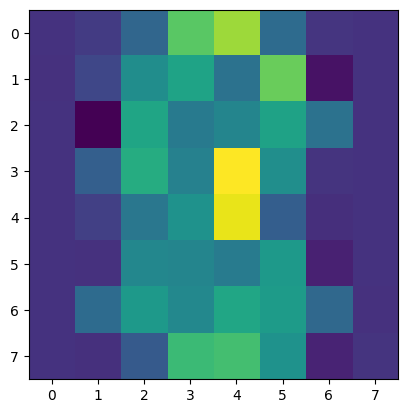

4


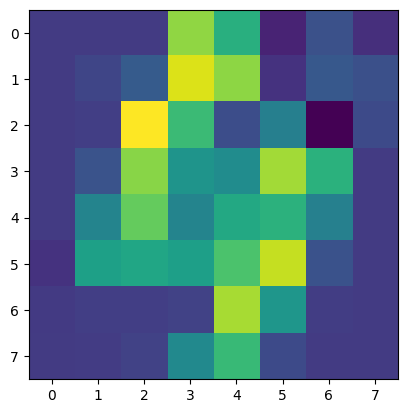

9


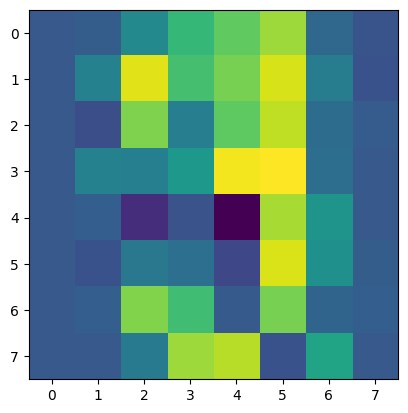

In [22]:
for i in range(3):
    print(ygen[i])
    plt.imshow(Xgen[i].reshape(8, 8))
    plt.show()

### Problem 1

Use Gaussian Naive Bayes to classify the titanic dataset

In [24]:
import os

if not os.path.exists('titanic'):
    !kaggle competitions download -c titanic
    !unzip titanic.zip -d titanic
    !rm *.zip

train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)
train_df.head()

target = 'Survived'
y_train = train_df[target]
X_train = train_df.drop(['Name', 'Ticket', 'Cabin', target], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


### Problem 2

Use Gaussian Naive Bayes to generate 10 samples of the titanic dataset.

### Problem 3

There are several features in the titanic dataset that are categorical. Do the samples generated from GaussianNB make sense?

In [25]:
X_train.nunique()

Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

### Problem 4

Fit categorical features with categorical distributions.